Exercise 1: Introduction to Data Analysis (Essay)

What is data analysis?
Data analysis is the process of inspecting, cleaning,
transforming, and interpreting data in order to find
useful information, draw conclusions, and support decisions.

Why is data analysis important?
In modern contexts, data analysis is essential because
organizations and individuals produce huge amounts of data
every day. Analyzing this data helps to improve efficiency,
discover trends, and make evidence-based decisions.

Three applications of data analysis today:
1. Healthcare: analyzing patient data to predict diseases
   and improve treatment effectiveness.
2. Finance: detecting fraud and managing investment risks.
3. Marketing: understanding customer behavior and
   personalizing advertising campaigns.

In [6]:
from google.colab import files
uploaded = files.upload()


Saving americans_sleep.csv to americans_sleep.csv
Saving creditcard_crx.csv to creditcard_crx.csv
Saving creditcard_dataset.csv to creditcard_dataset.csv
Saving Iris.csv to Iris.csv
Saving mental_health.csv to mental_health.csv


In [ ]:
from pathlib import Path
import pandas as pd

# Optional imports guarded where needed
import matplotlib.pyplot as plt

# In Colab, __file__ is not defined. We will adjust DATA_DIRS to look in common Colab locations.
# BASE_DIR = Path(__file__).resolve().parent # Removed this line
DATA_DIRS = [Path("/content/"), Path("/content/data"), Path("/content/sample_data")] # Adjusted DATA_DIRS

# Helpers

def find_file(candidate_stems, exts=(".csv", ".xlsx"), data_dirs=DATA_DIRS):
    """Return first existing Path that matches any stem + any ext in known data dirs."""
    for d in data_dirs:
        # Add recursive search within data directories
        for stem in candidate_stems:
            for ext in exts:
                # Check directly in the data directory
                p = (d / f"{stem}{ext}")
                if p.exists():
                    return p
                # Check in subdirectories (recursive search)
                for sub_p in d.rglob(f"{stem}{ext}"):
                    if sub_p.is_file():
                         return sub_p
    return None

def read_csv_smart(path: Path):
    """CSV reader that auto-detects delimiter and retries with latin-1 if needed."""
    try:
        return pd.read_csv(path, sep=None, engine="python")
    except UnicodeDecodeError:
        return pd.read_csv(path, sep=None, engine="python", encoding="latin-1")

def read_excel_smart(path: Path):
    """Excel reader that loads the first sheet by default."""
    try:
        return pd.read_excel(path)
    except Exception:
        xls = pd.ExcelFile(path)
        return pd.read_excel(path, sheet_name=xls.sheet_names[0])

def load_by_candidates(candidates):
    """Try CSV then XLSX for given candidate stems."""
    p = find_file(candidates, exts=(".csv",))
    if p:
        return read_csv_smart(p), p.name
    p = find_file(candidates, exts=(".xlsx",))
    if p:
        return read_excel_smart(p), p.name
    return None, None

def data_types_report(df: pd.DataFrame, title: str):
    """Print dtype and qualitative/quantitative classification per column."""
    print(f"\n=== Data Types Report: {title} ===")
    for col in df.columns:
        dtype = df[col].dtype
        # numeric kinds: b=bool, i=int, u=uint, f=float, c=complex
        quantitative = dtype.kind in {"b", "i", "u", "f", "c"}
        qclass = "quantitative" if quantitative else "qualitative"
        print(f"- {col}: {dtype} -> {qclass}")

In [8]:
# Exercise 2: Load datasets (Sleep, Mental Health, Credit Card)

# Sleep dataset
sleep_candidates = [
    "americans_sleep",
    "sleep_data",
    "How_Much_Sleep_Do_Americans_Really_Get",
    "sleep",
]
sleep_df, sleep_name = load_by_candidates(sleep_candidates)
if sleep_df is not None:
    print(f"\n✅ Loaded Sleep dataset: {sleep_name}")
    print(sleep_df.head())
    print(sleep_df.info())
else:
    print("\n❌ Sleep dataset not found. Expected one of:",
          ", ".join([s + ".csv/.xlsx" for s in sleep_candidates]))

# Mental health dataset (you have 'mental_health.csv')
mh_candidates = [
    "mental_health",
    "Global_Trends_in_Mental_Health",
    "global_mental_health",
]
mh_df, mh_name = load_by_candidates(mh_candidates)
if mh_df is not None:
    print(f"\n✅ Loaded Mental Health dataset: {mh_name}")
    print(mh_df.head())
    print(mh_df.info())
else:
    print("\n❌ Mental Health dataset not found. Expected one of:",
          ", ".join([s + ".csv/.xlsx" for s in mh_candidates]))

# Credit card approvals (you have 'creditcard_crx.csv' and 'creditcard_dataset.csv')
cc_candidates = [
    "creditcard_crx",
    "creditcard_dataset",
    "credit_card_approvals",
    "crx",
]
cc_df, cc_name = load_by_candidates(cc_candidates)
if cc_df is not None:
    print(f"\n✅ Loaded Credit Card dataset: {cc_name}")
    print(cc_df.head())
    print(cc_df.info())
else:
    print("\n❌ Credit Card dataset not found. Expected one of:",
          ", ".join([s + ".csv/.xlsx" for s in cc_candidates]))


✅ Loaded Sleep dataset: americans_sleep.csv
   index  Year  Period  Avg hrs per day sleeping  Standard Error Type of Days  \
0      0  2003  Annual                      8.57           0.018     All days   
1      1  2004  Annual                      8.55           0.026     All days   
2      2  2005  Annual                      8.62           0.023     All days   
3      3  2006  Annual                      8.63           0.024     All days   
4      4  2007  Annual                      8.57           0.024     All days   

           Age Group  Activity   Sex  
0  15 years and over  Sleeping  Both  
1  15 years and over  Sleeping  Both  
2  15 years and over  Sleeping  Both  
3  15 years and over  Sleeping  Both  
4  15 years and over  Sleeping  Both  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index          

In [9]:
# Exercise 3: Identify data types (for previous datasets)

if sleep_df is not None:
    data_types_report(sleep_df, f"Sleep ({sleep_name})")

if mh_df is not None:
    data_types_report(mh_df, f"Mental Health ({mh_name})")

if cc_df is not None:
    data_types_report(cc_df, f"Credit Card ({cc_name})")



=== Data Types Report: Sleep (americans_sleep.csv) ===
- index: int64 -> quantitative
- Year: int64 -> quantitative
- Period: object -> qualitative
- Avg hrs per day sleeping: float64 -> quantitative
- Standard Error: float64 -> quantitative
- Type of Days: object -> qualitative
- Age Group: object -> qualitative
- Activity: object -> qualitative
- Sex: object -> qualitative

=== Data Types Report: Mental Health (mental_health.csv) ===
- index: int64 -> quantitative
- Entity: object -> qualitative
- Code: object -> qualitative
- Year: object -> qualitative
- Schizophrenia (%): object -> qualitative
- Bipolar disorder (%): object -> qualitative
- Eating disorders (%): object -> qualitative
- Anxiety disorders (%): float64 -> quantitative
- Drug use disorders (%): float64 -> quantitative
- Depression (%): float64 -> quantitative
- Alcohol use disorders (%): float64 -> quantitative

=== Data Types Report: Credit Card (creditcard_crx.csv) ===
- b: object -> qualitative
- 30.83: object -> 

In [10]:
# Exercise 4: Iris dataset (prefer Kaggle Iris.csv; else sklearn)

iris_df = None
iris_src = None

iris_csv = find_file(["Iris"], exts=(".csv",))
if iris_csv:
    iris_df = read_csv_smart(iris_csv)
    iris_src = iris_csv.name
else:
    try:
        from sklearn.datasets import load_iris
        iris_bunch = load_iris(as_frame=True)
        iris_df = iris_bunch.frame.copy()
        # sklearn returns 'target' numeric; map to names for qualitative column
        iris_df["species"] = iris_df["target"].map(dict(enumerate(iris_bunch.target_names)))
        iris_df.drop(columns=["target"], inplace=True)
        iris_src = "sklearn.load_iris()"
    except Exception as e:
        print("\n❌ Could not load Iris via Kaggle CSV or sklearn:", e)

if iris_df is not None:
    print(f"\n✅ Loaded Iris dataset from: {iris_src}")
    print(iris_df.head())
    print(iris_df.info())

    # Classify columns (qualitative vs quantitative)
    data_types_report(iris_df, f"Iris ({iris_src})")
else:
    print("\n⚠️ Skipping Iris exercises because Iris dataset is unavailable.")



✅ Loaded Iris dataset from: Iris.csv
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memo


=== Basic stats on Iris column: SepalLengthCm ===
Mean: 5.843333333333334
Median: 5.8
Mode: 5.0


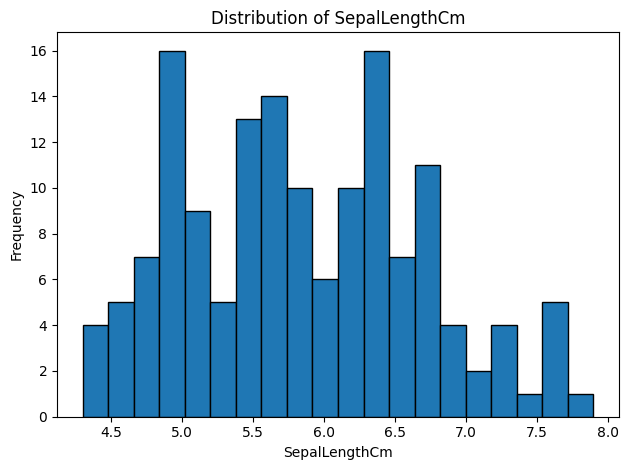

In [11]:
# Exercise 5: Basic analysis on Iris (mean, median, mode + histogram)

if iris_df is not None:
    # Choose a quantitative column that exists in either Kaggle or sklearn schema
    # sklearn: 'sepal length (cm)' ; Kaggle: 'SepalLengthCm'
    quantitative_candidates = [
        "sepal length (cm)",
        "SepalLengthCm",
        "petal length (cm)",
        "PetalLengthCm",
        "sepal width (cm)",
        "SepalWidthCm",
        "petal width (cm)",
        "PetalWidthCm",
    ]
    qcol = next((c for c in quantitative_candidates if c in iris_df.columns), None)
    if qcol is None:
        print("\n❌ No known quantitative column found in Iris to compute stats.")
    else:
        print(f"\n=== Basic stats on Iris column: {qcol} ===")
        series = pd.to_numeric(iris_df[qcol], errors="coerce").dropna()
        if series.empty:
            print("Column has no numeric data after coercion.")
        else:
            mean_val = series.mean()
            median_val = series.median()
            mode_val = series.mode().iloc[0] if not series.mode().empty else None

            print("Mean:", mean_val)
            print("Median:", median_val)
            print("Mode:", mode_val)

            # Histogram visualization
            plt.hist(series, bins=20, edgecolor="black")
            plt.title(f"Distribution of {qcol}")
            plt.xlabel(qcol)
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()
else:
    print("\n⚠️ Skipping Exercise 5 (Iris) because Iris dataset is unavailable.")


In [12]:
# Exercise 6: Observation on Sleep dataset

def pick_columns(df: pd.DataFrame, wanted):
    """Return the first matching column for each logical key in 'wanted'."""
    cols = {k: None for k in wanted}
    lower_cols = {c.lower(): c for c in df.columns}
    for key, patterns in wanted.items():
        for p in patterns:
            # direct match
            if p in df.columns:
                cols[key] = p
                break
            # case-insensitive contains
            for lc, orig in lower_cols.items():
                if p.lower() in lc:
                    cols[key] = orig
                    break
            if cols[key]:
                break
    return cols

if sleep_df is not None:
    # Try to find Age, SleepHours, Gender-ish columns even if names differ
    wanted = {
        "age": ["Age", "age", "AGE"],
        "sleep": ["SleepHours", "sleep", "hours", "sleep_hours", "sleep duration"],
        "gender": ["Gender", "gender", "sex", "Sex"],
    }
    found = pick_columns(sleep_df, wanted)
    print("\n=== Exercise 6: Candidate columns for observations (Sleep) ===")
    print(found)

    chosen = [c for c in found.values() if c]
    if chosen:
        print("\nSuggested analyses:")
        if found["age"] and found["sleep"]:
            print("- Trend/group comparison: Does sleep vary with age?")
        if found["gender"] and found["sleep"]:
            print("- Group comparison: Average sleep hours by gender.")
        # Show a quick group preview if possible (no heavy analysis here)
        if found["gender"] and found["sleep"]:
            preview = (
                sleep_df[[found["gender"], found["sleep"]]]
                .dropna()
                .groupby(found["gender"])
                .agg(avg_sleep=(found["sleep"], "mean"), n=(found["sleep"], "count"))
                .sort_values("avg_sleep", ascending=False)
                .head(10)
            )
            print("\nPreview (avg sleep by gender):")
            print(preview)
    else:
        print("Could not guess suitable columns; please check your headers.")
else:
    print("\n⚠️ Skipping Exercise 6 because Sleep dataset is unavailable.")



=== Exercise 6: Candidate columns for observations (Sleep) ===
{'age': 'Age Group', 'sleep': 'Avg hrs per day sleeping', 'gender': 'Sex'}

Suggested analyses:
- Trend/group comparison: Does sleep vary with age?
- Group comparison: Average sleep hours by gender.

Preview (avg sleep by gender):
       avg_sleep    n
Sex                  
Women   8.881175  315
Both    8.807841  315
Men     8.731587  315
